<img src="https://fsdl.me/logo-720-dark-horizontal">

This notebook accompanies [this YouTube video](https://www.youtube.com/watch?v=zaYTXQFR0_s)
walking through what LangChain is and interviewing the creator, Harrison Chase.

## Auth

In [1]:
import os
import pickle

# %env OPENAI_API_KEY=PUT-YOUR-KEY-HERE
# assert os.environ["OPENAI_API_KEY"] != "PUT-YOUR-KEY-HERE", "Provide an OpenAI API key to continue"


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:

sh_file_path = "drive/MyDrive/.openai/set_openai_key.sh"
!source {sh_file_path}

In [4]:
! ls "drive/MyDrive/.openai/set_openai_key.sh"

drive/MyDrive/.openai/set_openai_key.sh


In [5]:
! echo $OPENAI_API_KEY

In [49]:
!cat {sh_file_path}


In [50]:
os.environ["OPENAI_API_KEY"] = input("Paste your OpenAI API key here and hit enter:")

## LLMs without context are internet simulators, which aren't always useful

In [8]:
!pip install -qqq langchain openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.5 MB/s eta 0:00:00


In [9]:
from langchain.llms import OpenAI


llm = OpenAI(model_name="text-davinci-003", temperature=0)

In [11]:
import textwrap

print("\n".join(textwrap.wrap(llm("What is LangChain?").strip())))

LangChain is a blockchain-based language learning platform that allows
users to learn languages through a decentralized network. It uses a
token-based system to reward users for their language learning
activities, such as completing lessons, taking quizzes, and
participating in conversations. The platform also provides users with
access to a variety of language learning resources, such as courses,
audio lessons, and language exchange partners.


#### Not necessarily wrong, just not "contextualized"

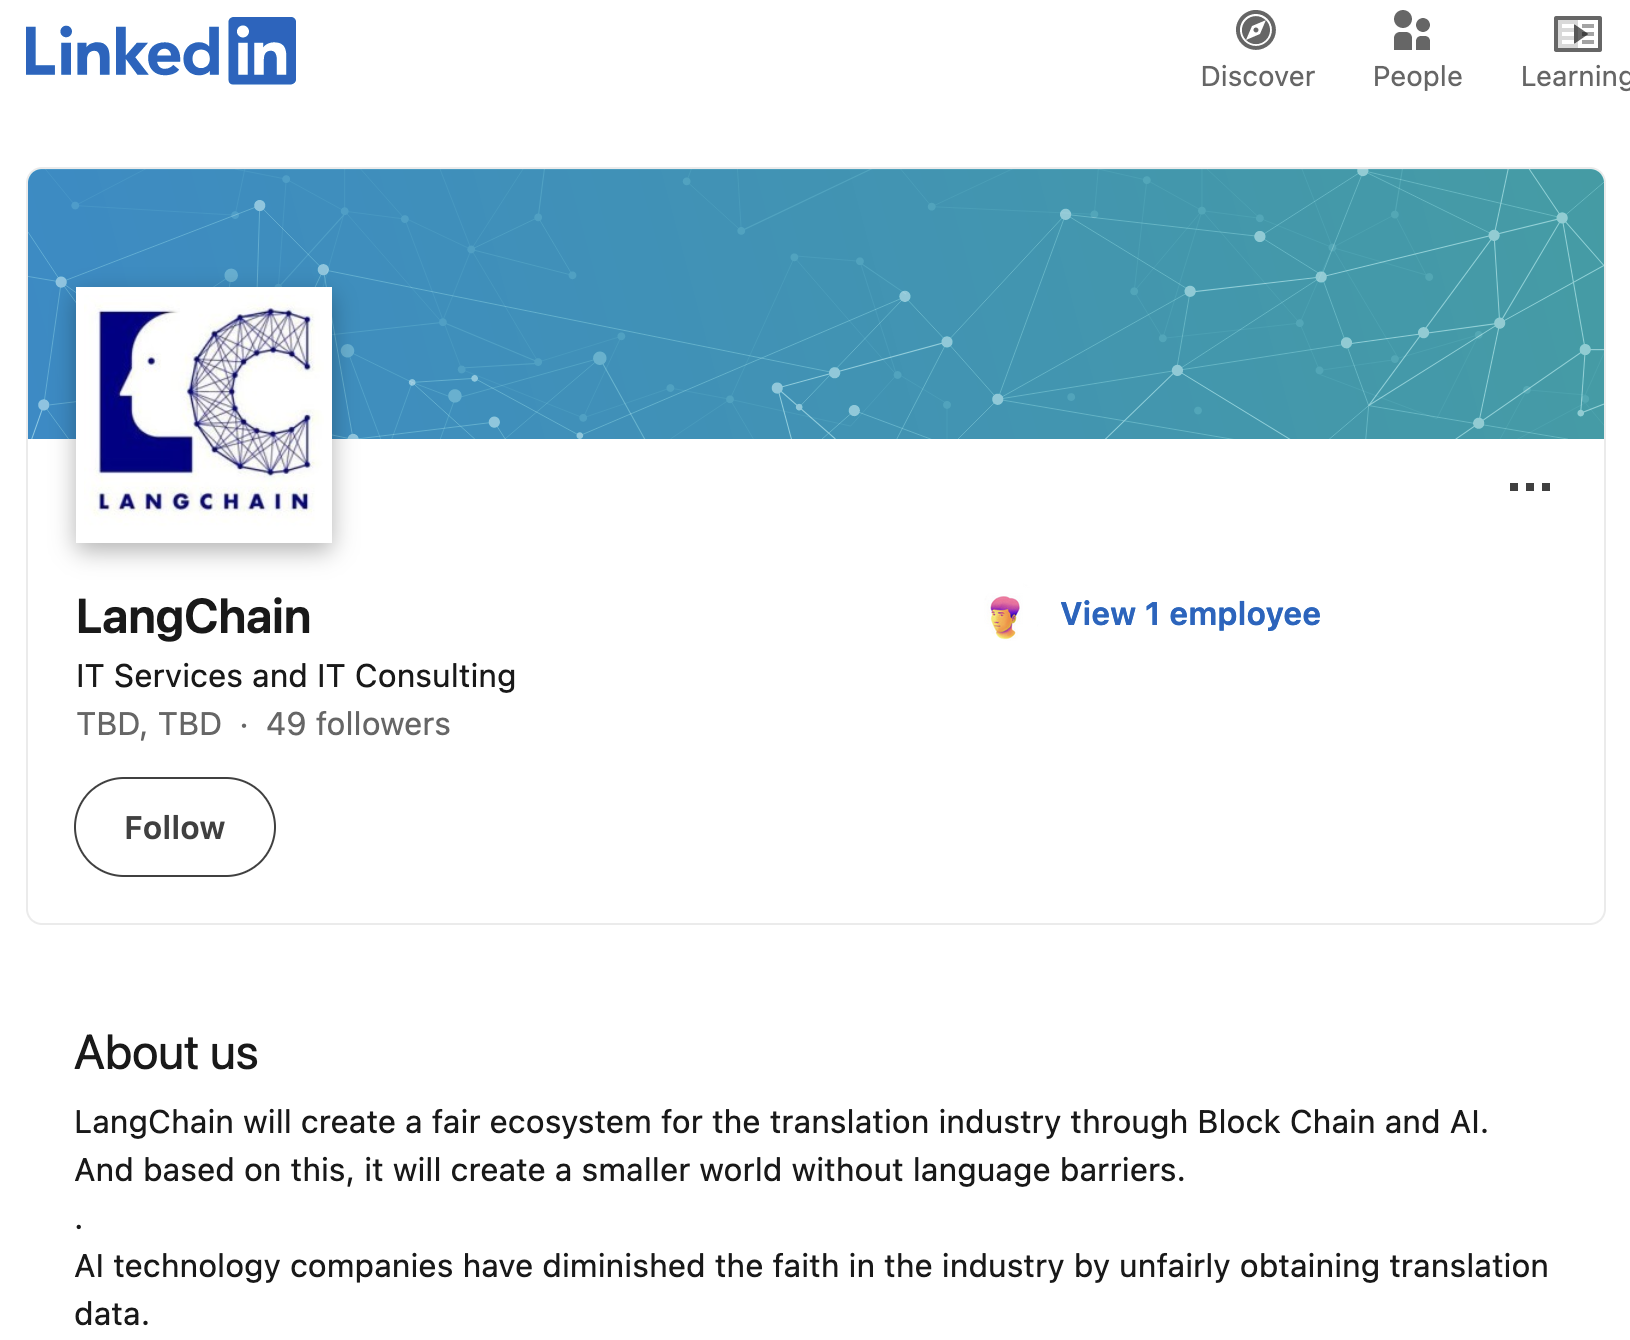

## Resolution: Ingress context smaller than the internet but bigger than the prompt, then sub-select

### Scrape the docs into text

In [12]:
toplevel = "https://langchain.readthedtext_splitterocs.io/en/latest"

In [13]:
import requests

response = requests.get(toplevel)
response

<Response [200]>

In [14]:
from IPython import display


display.HTML(data=response.text)

In [ ]:
!pip install -qqq beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(response.text, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="Docutils 0.17.1: http://docutils.sourceforge.net/" name="generator"/>
  <title>
   Welcome to LangChain — 🦜🔗 LangChain 0.0.195
  </title>
  <script data-cfasync="false">
   document.documentElement.dataset.mode = localStorage.getItem("mode") || "";
    document.documentElement.dataset.theme = localStorage.getItem("theme") || "light";
  </script>
  <!-- Loaded before other Sphinx assets -->
  <link href="_static/styles/theme.css?digest=12da95d707ffb74b382d" rel="stylesheet"/>
  <link href="_static/styles/bootstrap.css?digest=12da95d707ffb74b382d" rel="stylesheet"/>
  <link href="_static/styles/pydata-sphinx-theme.css?digest=12da95d707ffb74b382d" rel="stylesheet"/>
  <link href="_static/vendor/fontawesome/6.1.2/css/all.min.css?digest=12da95d707ffb74b382d" rel="stylesheet"/>
  <link as="font" crossorigin="" href="_static/vendor/fonta

In [ ]:
anchors_attrs = [anchor.attrs for anchor in soup.find_all('a')]

In [ ]:
paths = []

for anchor_attrs in anchors_attrs:
    try:
        classes = anchor_attrs["class"]
        link = anchor_attrs["href"]
        if "reference" in classes:
            if "internal" in classes:
                paths.append(link)
            elif "external" in classes:
                if link.startswith("./"):
                    paths.append(link[len("./"):])
                else:
                    pass # not a link to docs
            else:
                pass # i didn't understand that reference
        else:
            pass # not a reference
    except KeyError:
       print("no classes or no href:", anchor_attrs)

In [ ]:
paths = ["index.html"] + paths
print(paths)

['index.html', 'getting_started/getting_started.html', 'getting_started/concepts.html', 'getting_started/tutorials.html', 'modules/models.html', 'modules/models/getting_started.html', 'modules/models/llms.html', 'modules/models/llms/getting_started.html', 'modules/models/llms/how_to_guides.html', 'modules/models/llms/examples/async_llm.html', 'modules/models/llms/examples/custom_llm.html', 'modules/models/llms/examples/fake_llm.html', 'modules/models/llms/examples/human_input_llm.html', 'modules/models/llms/examples/llm_caching.html', 'modules/models/llms/examples/llm_serialization.html', 'modules/models/llms/examples/streaming_llm.html', 'modules/models/llms/examples/token_usage_tracking.html', 'modules/models/llms/integrations.html', 'modules/models/llms/integrations/ai21.html', 'modules/models/llms/integrations/aleph_alpha.html', 'modules/models/llms/integrations/anyscale.html', 'modules/models/llms/integrations/aviary.html', 'modules/models/llms/integrations/azure_openai_example.ht

In [ ]:
%%time
import requests

pages = []

for path in paths:
    try:
        url = "/".join([toplevel, path])
        resp = requests.get(url)
        resp.raise_for_status()
    except Exception:
        print(url)
    finally:
        pages.append({"content": resp.content, "url": url})

CPU times: user 22.8 s, sys: 1.61 s, total: 24.4 s
Wall time: 21min 2s


In [ ]:
with open('/content/drive/MyDrive/expa/askLangChainTestProject/pages.pkl', 'wb') as f:
  pickle.dump(pages, f)

In [17]:
with open('/content/drive/MyDrive/expa/askLangChainTestProject/pages.pkl', 'rb') as f:
  pages = pickle.load(f)

In [18]:
len(pages)

647

In [19]:
!pip install -qqq unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 30.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 6.7 MB/s eta 0:00

In [18]:
pages[0]

{'content': b'\n\n<!DOCTYPE html>\n\n\n<html lang="en" >\n\n  <head>\n    <meta charset="utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" /><meta name="generator" content="Docutils 0.17.1: http://docutils.sourceforge.net/" />\n\n    <title>Welcome to LangChain &#8212; \xf0\x9f\xa6\x9c\xf0\x9f\x94\x97 LangChain 0.0.195</title>\n  \n  \n  \n  <script data-cfasync="false">\n    document.documentElement.dataset.mode = localStorage.getItem("mode") || "";\n    document.documentElement.dataset.theme = localStorage.getItem("theme") || "light";\n  </script>\n  \n  <!-- Loaded before other Sphinx assets -->\n  <link href="_static/styles/theme.css?digest=12da95d707ffb74b382d" rel="stylesheet" />\n<link href="_static/styles/bootstrap.css?digest=12da95d707ffb74b382d" rel="stylesheet" />\n<link href="_static/styles/pydata-sphinx-theme.css?digest=12da95d707ffb74b382d" rel="stylesheet" />\n\n  \n  <link href="_static/vendor/fontawesome/6.1.2/css/all.min.css?digest=1

In [19]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [20]:
from unstructured.partition.html import partition_html



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [21]:
temp = partition_html(text=pages[0]["content"])

In [22]:
temp

In [27]:
str(temp[0]).strip().replace("\\n", "")

'Welcome to LangChain#'

In [23]:
%%time
parsed_docs = [partition_html(text=page["content"]) for page in pages]

CPU times: user 41.9 s, sys: 470 ms, total: 42.4 s
Wall time: 46.9 s


In [24]:
texts = []
for doc in parsed_docs:
    texts.append("\n\n".join(
        [str(el).strip() for el in doc]).strip().replace("\\n", ""))

In [30]:
print(*textwrap.wrap(texts[0]), sep="\n")

Welcome to LangChain#    Data-aware: connect a language model to other
sources of data  Agentic: allow a language model to interact with its
environment    The LangChain framework is designed around these
principles.    This is the Python specific portion of the
documentation. For a purely conceptual guide to LangChain, see  here.
For the JavaScript documentation, see  here.  Getting Started#    How
to get started using LangChain to create an Language Model
application.  Quickstart Guide    Concepts and terminology.  Concepts
and terminology    Tutorials created by community experts and
presented on YouTube.  Tutorials    Modules#    These modules are the
core abstractions which we view as the building blocks of any LLM-
powered application.  For each module LangChain provides standard,
extendable interfaces. LangChain also provides external integrations
and even end-to-end implementations for off-the-shelf use.    The docs
for each module contain quickstart examples, how-to guides, re

In [25]:
for page, text in zip(pages, texts):
    page["text"] = text

In [26]:
pages[0].keys()

dict_keys(['content', 'url', 'text'])

In [27]:
with open('/content/drive/MyDrive/expa/askLangChainTestProject/pages_with_text.pkl', 'wb') as f:
  pickle.dump(pages, f)

In [28]:
with open('/content/drive/MyDrive/expa/askLangChainTestProject/pages_with_text.pkl', 'rb') as f:
  pages = pickle.load(f)

In [29]:
pages[0].keys()

dict_keys(['content', 'url', 'text'])

#### Low-key alert: this belongs in a DB

In [30]:
import pandas as pd


pd.DataFrame(pages).sample(10)

,content,url,text
386,"b'\n\n<!DOCTYPE html>\n\n\n<html lang=""en"" >\n...",https://langchain.readthedocs.io/en/latest/mod...,MRKL Chat#\n\nThis notebook showcases using an...
480,"b'\n\n<!DOCTYPE html>\n\n\n<html lang=""en"" >\n...",https://langchain.readthedocs.io/en/latest/int...,Arxiv#\n\narXiv is an open-access archive for ...
358,"b'\n\n<!DOCTYPE html>\n\n\n<html lang=""en"" >\n...",https://langchain.readthedocs.io/en/latest/mod...,HuggingFace Tools#\n\nHuggingface Tools suppor...
120,"b'\n\n<!DOCTYPE html>\n\n\n<html lang=""en"" >\n...",https://langchain.readthedocs.io/en/latest/mod...,Structured Output Parser#\n\nWhile the Pydanti...
437,"b'\n\n<!DOCTYPE html>\n\n\n<html lang=""en"" >\n...",https://langchain.readthedocs.io/en/latest/use...,Question Answering Benchmarking: State of the ...
392,"b'\n\n<!DOCTYPE html>\n\n\n<html lang=""en"" >\n...",https://langchain.readthedocs.io/en/latest/mod...,CSV Agent#\n\nThis notebook shows how to use a...
408,"b'\n\n<!DOCTYPE html>\n\n\n<html lang=""en"" >\n...",https://langchain.readthedocs.io/en/latest/mod...,How to use the async API for Agents#\n\nLangCh...
475,"b'\n\n<!DOCTYPE html>\n\n\n<html lang=""en"" >\n...",https://langchain.readthedocs.io/en/latest/int...,Annoy#\n\nAnnoy (Approximate Nearest Neighbors...
197,"b'\n\n<!DOCTYPE html>\n\n\n<html lang=""en"" >\n...",https://langchain.readthedocs.io/en/latest/mod...,Azure Blob Storage Container#\n\nAzure Blob St...
281,"b'\n\n<!DOCTYPE html>\n\n\n<html lang=""en"" >\n...",https://langchain.readthedocs.io/en/latest/mod...,Contextual Compression#\n\nThis notebook intro...


### Chunk the text for use inside LLM prompts

In [31]:
from langchain.text_splitter import CharacterTextSplitter

In [32]:
from langchain.text_splitter import NLTKTextSplitter

In [33]:
!pip install -qqq tiktoken
# tiktoken is the encoder of choice for openai models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.8 MB/s eta 0:00:00


In [34]:
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=950, chunk_overlap=128, separator=" ")


In [35]:
documents = text_splitter.create_documents(
    [page["text"] for page in pages], metadatas=[{"source": page["url"]} for page in pages])

In [36]:
# TODO: try other text split strategies :
# NLTKTextSplitter

In [37]:
print(documents[0].metadata["source"], *textwrap.wrap(documents[0].page_content), sep="\n")

https://langchain.readthedocs.io/en/latest/index.html
Welcome to LangChain#    Data-aware: connect a language model to other
sources of data  Agentic: allow a language model to interact with its
environment    The LangChain framework is designed around these
principles.    This is the Python specific portion of the
documentation. For a purely conceptual guide to LangChain, see  here.
For the JavaScript documentation, see  here.  Getting Started#    How
to get started using LangChain to create an Language Model
application.  Quickstart Guide    Concepts and terminology.  Concepts
and terminology    Tutorials created by community experts and
presented on YouTube.  Tutorials    Modules#    These modules are the
core abstractions which we view as the building blocks of any LLM-
powered application.  For each module LangChain provides standard,
extendable interfaces. LangChain also provides external integrations
and even end-to-end implementations for off-the-shelf use.    The docs
for each

In [39]:
print(documents[1].metadata["source"], *textwrap.wrap(documents[1].page_content), sep="\n")

https://langchain.readthedocs.io/en/latest/index.html
in an attempt to accomplish an objective. Examples include AutoGPT and
BabyAGI.  Agent Simulations: Putting agents in a sandbox and observing
how they interact with each other and react to events can be an
effective way to evaluate their long-range reasoning and planning
abilities.  Personal Assistants: One of the primary LangChain use
cases. Personal assistants need to take actions, remember
interactions, and have knowledge about your data.  Question Answering:
Another common LangChain use case. Answering questions over specific
documents, only utilizing the information in those documents to
construct an answer.  Chatbots: Language models love to chat, making
this a very natural use of them.  Querying Tabular Data: Recommended
reading if you want to use language models to query structured data
(CSVs, SQL, dataframes, etc).  Code Understanding: Recommended reading
if you want to use language models to analyze code.  Interacting with

In [40]:
with open('/content/drive/MyDrive/expa/askLangChainTestProject/documents.pkl', 'wb') as f:
  pickle.dump(documents, f)

In [41]:
with open('/content/drive/MyDrive/expa/askLangChainTestProject/documents.pkl', 'rb') as f:
  documents = pickle.load(f)

### Enable search over text chunks

#### Here, using embeddings and vector search

In [42]:
from langchain.embeddings.openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

In [43]:
!pip install -qqq faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 48.4 MB/s eta 0:00:00


In [44]:
from langchain.vectorstores import FAISS

docsearch = FAISS.from_documents(documents, embeddings)

In [45]:
docsearch.save_local("/content/drive/MyDrive/expa/askLangChainTestProject/doc_db_faiss")

In [46]:
db = FAISS.load_local("/content/drive/MyDrive/expa/askLangChainTestProject/doc_db_faiss", embeddings)


### Ask questions and get answers

In [47]:
from langchain.chains.qa_with_sources import load_qa_with_sources_chain


chain = load_qa_with_sources_chain(llm, chain_type="stuff")

In [48]:
query = "What is LangChain?"
# query = "What is LangChainHub?"
# query = "Does LangChain integrate with OpenAI? If so, how?"

docs = db.similarity_search(query)
result = chain({"input_documents": docs, "question": query})

text = "\n".join(textwrap.wrap(result["output_text"]))
text = "\n\nSOURCES:\n".join(map(lambda s: s.strip(), text.split("SOURCES:")))

print(text)

LangChain is a framework for developing applications powered by
language models. It provides out-of-the-box support to build NLP
applications using LLMs, and it can be used for chatbots, Generative
Question-Answering (GQA), summarization, and more. It was created by
Harrison Chase in October 2022.

SOURCES:
https://langchain.readthedocs
.io/en/latest/modules/chains/examples/flare.html, https://langchain.re
adthedocs.io/en/latest/modules/indexes/document_loaders/examples/markd
own.html


In [ ]:
print(chain.llm_chain.prompt.template)

Given the following extracted parts of a long document and a question, create a final answer with references ("SOURCES"). 
If you don't know the answer, just say that you don't know. Don't try to make up an answer.
ALWAYS return a "SOURCES" part in your answer.

QUESTION: Which state/country's law governs the interpretation of the contract?
Content: This Agreement is governed by English law and the parties submit to the exclusive jurisdiction of the English courts in  relation to any dispute (contractual or non-contractual) concerning this Agreement save that either party may apply to any court for an  injunction or other relief to protect its Intellectual Property Rights.
Source: 28-pl
Content: No Waiver. Failure or delay in exercising any right or remedy under this Agreement shall not constitute a waiver of such (or any other)  right or remedy.

11.7 Severability. The invalidity, illegality or unenforceability of any term (or part of a term) of this Agreement shall not affect the con

In [ ]:
print(*textwrap.wrap(result["input_documents"][0].page_content), sep="\n")

know how Blockchain and Distributed ... Duration: 44:31. Posted: May
4, 2021. A blockchain is a distributed and immutable ledger to
transfer ownership, record transactions, track assets, and ensure
transparency, security, trust and value ... Missing: Langchain | Must
include:Langchain.  LangChain is an intuitive framework created to
assist in developing applications driven by a language model, such as
OpenAI or Hugging Face. Missing: decentralized | Must
include:decentralized. LangChain, created by Harrison Chase, is a
Python library that provides out-of-the-box support to build NLP
applications using LLMs. Missing: decentralized | Must
include:decentralized. LangChain provides a standard interface for
chains, enabling developers to create sequences of calls that go
beyond a single LLM call. Chains ... Missing: decentralized platform
natural. LangChain is a powerful framework that simplifies the process
of building advanced language model applications. Missing: platform |
Must include: